In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [3]:
X,y = data

In [4]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [5]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [6]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


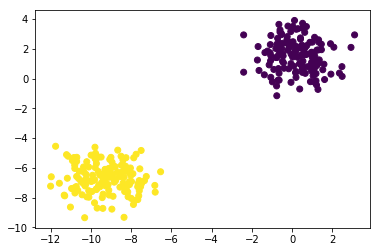

In [7]:
plt.scatter(feat['X1'],feat['X2'],c=y)

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


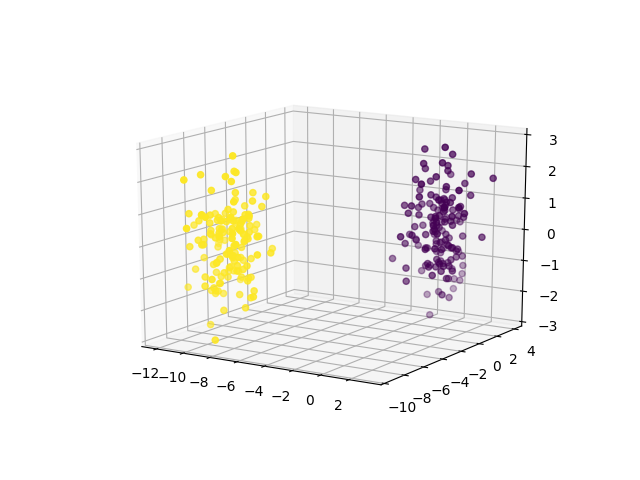

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

# Encoder and Decoder

In [11]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [12]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [13]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [15]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [ ]:
# scaled_data

In [16]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 2ms/sample - loss: 0.2055
Epoch 2/5
300/300 [==============================] - 0s 82us/sample - loss: 0.1495
Epoch 3/5
300/300 [==============================] - 0s 77us/sample - loss: 0.1373
Epoch 4/5
300/300 [==============================] - 0s 62us/sample - loss: 0.1363
Epoch 5/5
300/300 [==============================] - 0s 74us/sample - loss: 0.1369


In [17]:
encoded_2dim = encoder.predict(scaled_data)

In [18]:
encoded_2dim

array([[0.        , 0.        ],
       [0.        , 1.0828457 ],
       [0.        , 0.9894593 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 1.0861005 ],
       [0.        , 0.        ],
       [0.        , 1.2887154 ],
       [0.        , 0.99404633],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 1.1280521 ],
       [0.        , 0.10833812],
       [0.        , 1.1127177 ],
       [0.        , 0.        ],
       [0.        , 0.98993146],
       [0.        , 0.89562654],
       [0.        , 0.7356579 ],
       [0.        , 0.9267489 ],
       [0.        , 0.        ],
       [0.        , 0.9531871 ],
       [0.        , 1.2902524 ],
       [0.        , 0.02928434],
       [0.        , 0.        ],
       [0.        , 1.025069  ],
       [0.        , 1.0407668 ],
       [0.        , 0.97810125],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.

<IPython.core.display.Javascript object>


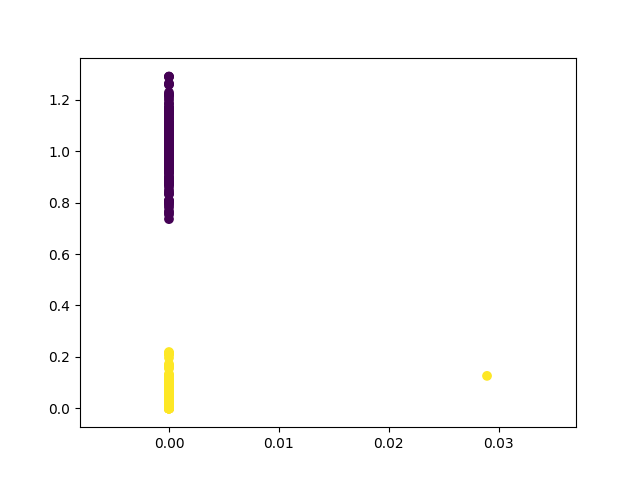

In [19]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)